dataset source: https://www.kaggle.com/datasets/gpiosenka/100-bird-species

In [1]:
import tensorflow as tf
import tensorflow.keras.utils
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau

from  matplotlib import pyplot as plt

%matplotlib inline


In [2]:
tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
#tf.debugging.set_log_device_placement(True)

In [4]:
print('tensorflow: %s' % tensorflow.__version__)

tensorflow: 2.8.0


In [5]:
train_path = r'...\archive\train_100'
test_path = r'...\test_100'
valid_path = r'...\archive\valid_100'

IMG_SHAPE = (244, 244)
BATCH_SIZE = 8

Found 500 images belonging to 100 classes.


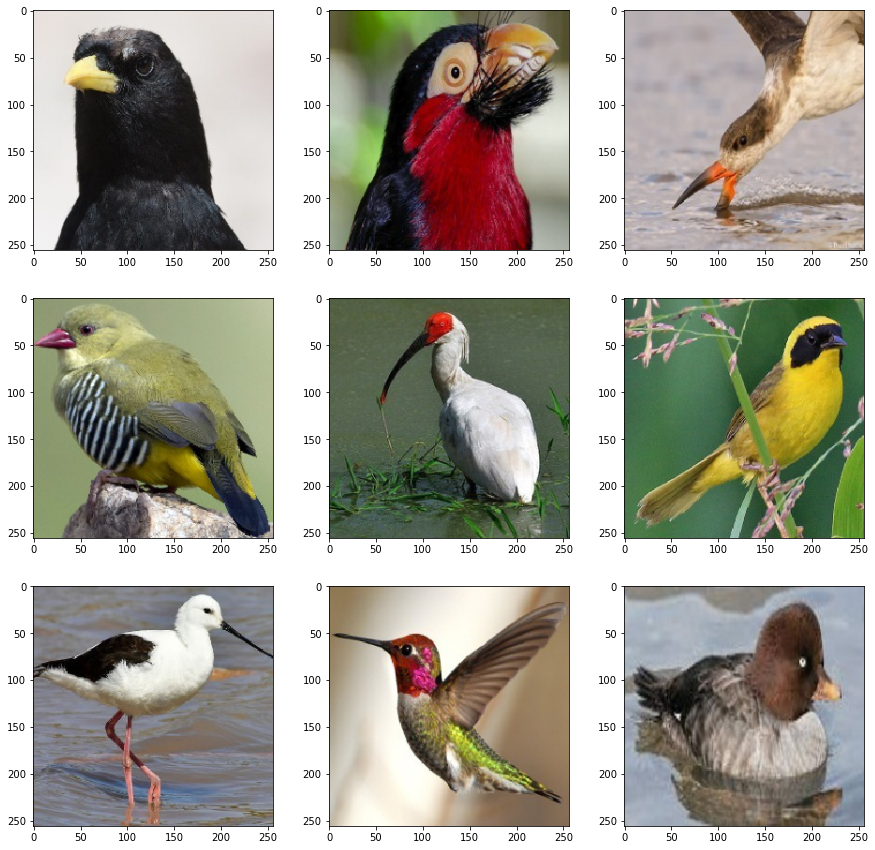

In [6]:
sample_generator = ImageDataGenerator().flow_from_directory(test_path, shuffle = True)

plt.figure(figsize = (15,15))
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = sample_generator.next()[0]
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  label_mode = 'categorical',
  image_size = IMG_SHAPE,
  batch_size = BATCH_SIZE)

Found 14507 files belonging to 100 classes.


In [8]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_path,
  label_mode = 'categorical',
  image_size = IMG_SHAPE,
  batch_size = BATCH_SIZE)

Found 500 files belonging to 100 classes.


In [9]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
  valid_path,
  label_mode = 'categorical',
  image_size = IMG_SHAPE,
  batch_size = BATCH_SIZE)

Found 500 files belonging to 100 classes.


In [10]:
class_names = train_ds.class_names

In [11]:
train_ds = train_ds.cache()
test_ds = test_ds.cache()
valid_ds = valid_ds.cache()

In [12]:
num_classes = len(class_names)

In [13]:
tf.keras.backend.clear_session()

In [14]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2,fill_mode = 'nearest')
])

In [15]:
base_model = tf.keras.applications.EfficientNetB7(include_top=False)

In [16]:
inputs = tf.keras.Input(shape = (244,244,3))
x = data_augmentation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name = 'Global_Average_Pool_2D')(x)

outputs = layers.Dense(num_classes, activation = 'softmax')(x)

In [17]:
model = keras.Model(inputs, outputs, name = "model")

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 244, 244, 3)       0         
                                                                 
 efficientnetb7 (Functional)  (None, None, None, 2560)  64097687 
                                                                 
 Global_Average_Pool_2D (Glo  (None, 2560)             0         
 balAveragePooling2D)                                            
                                                                 
 dense (Dense)               (None, 100)               256100    
                                                                 
Total params: 64,353,787
Trainable params: 64,043,060
Non-trainable params: 310,727
___________________________________________

In [18]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, decay = 1e-6, momentum = 0.9, nesterov = True),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [19]:
history = model.fit( 
    train_ds, 
    steps_per_epoch = len(train_ds), 
    epochs = 5,
    validation_data = valid_ds,
    validation_steps = len(valid_ds),
)

Epoch 1/5
1814/1814 [==============================] - 824s 442ms/step - loss: 0.8890 - accuracy: 0.7893 - val_loss: 0.0898 - val_accuracy: 0.9720
Epoch 2/5
1814/1814 [==============================] - 791s 436ms/step - loss: 0.1421 - accuracy: 0.9614 - val_loss: 0.0531 - val_accuracy: 0.9820
Epoch 3/5
1814/1814 [==============================] - 795s 438ms/step - loss: 0.0694 - accuracy: 0.9801 - val_loss: 0.0383 - val_accuracy: 0.9920
Epoch 4/5
1814/1814 [==============================] - 793s 437ms/step - loss: 0.0437 - accuracy: 0.9880 - val_loss: 0.0474 - val_accuracy: 0.9800
Epoch 5/5
1814/1814 [==============================] - 796s 439ms/step - loss: 0.0276 - accuracy: 0.9937 - val_loss: 0.0517 - val_accuracy: 0.9880


In [20]:
model.save('saved_model/my_model1.h5')

In [21]:
model.save('saved_model/my_model2')

INFO:tensorflow:Assets written to: saved_model/my_model2\assets
